In [1]:
!pip install --upgrade pip

In [3]:

!pip show tensorflow

In [6]:
!pip3 install tensorflow


  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
     ------------------------------------ 272.8/272.8 MB 104.6 kB/s eta 0:00:00
  Using cached jax-0.4.11-py3-none-any.whl
  Using cached protobuf-4.23.2-cp39-cp39-win_amd64.whl (422 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-any.whl (2.4 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Can't uninstall 'wrapt'. No files were found to uninstall.
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Can't uninstall 'tensorflow-estimator'. N

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\aishw\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\aishw\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have oc

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
     ------------------------------------ 272.8/272.8 MB 202.7 kB/s eta 0:00:00
  Using cached jax-0.4.11-py3-none-any.whl
  Using cached protobuf-4.23.2-cp39-cp39-win_amd64.whl (422 kB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-any.whl (2.4 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Can't uninstall 'wrapt'. No files were found to uninstall.
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Can't uninstall 'tensorflow-estimator'. N

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\aishw\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "hackdataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 438 files belonging to 5 classes.


In [6]:
class_names=dataset.class_names

In [7]:
class_names

['Grassy Shoots', 'Healthy', 'Mites', 'Ring Spot', 'YLD']

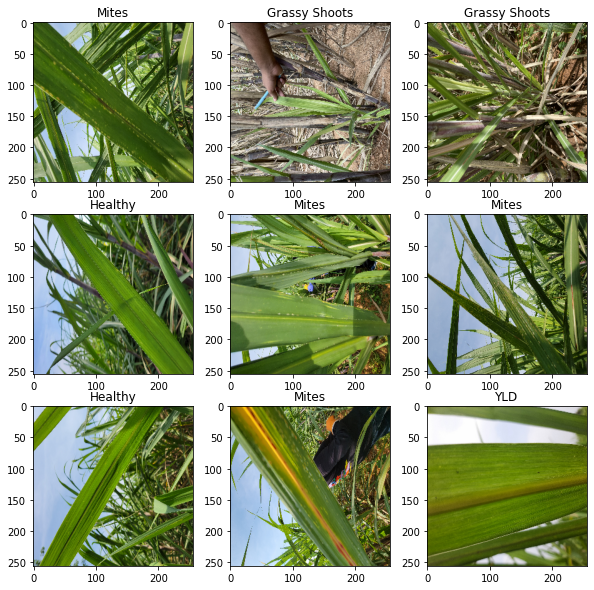

In [6]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])

In [7]:
from pathlib import Path
import imghdr

data_dir = "Leave DataSet"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

11

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from efficientnet.tfkeras import EfficientNetB0

# Define parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20
num_classes = 5
train_data_dir = 'hackdataset'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='training')
val_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='categorical', subset='validation')

# Load pre-trained EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add new top layers for our dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the model
model.save('my_efficientnet_model.h5')


Found 351 images belonging to 5 classes.
Found 87 images belonging to 5 classes.
Epoch 1/20
11/11 [==============================] - 160s 14s/step - loss: 0.7687 - accuracy: 0.6809 - val_loss: 0.6393 - val_accuracy: 0.7471
Epoch 2/20
11/11 [==============================] - 103s 9s/step - loss: 0.2972 - accuracy: 0.9145 - val_loss: 0.4988 - val_accuracy: 0.8391
Epoch 3/20
11/11 [==============================] - 104s 10s/step - loss: 0.2247 - accuracy: 0.9145 - val_loss: 0.5602 - val_accuracy: 0.8276
Epoch 4/20
11/11 [==============================] - 80s 7s/step - loss: 0.1710 - accuracy: 0.9430 - val_loss: 0.5809 - val_accuracy: 0.7816
Epoch 5/20
11/11 [==============================] - 66s 6s/step - loss: 0.0993 - accuracy: 0.9687 - val_loss: 0.7117 - val_accuracy: 0.7701
Epoch 6/20
11/11 [==============================] - 100s 9s/step - loss: 0.1440 - accuracy: 0.9402 - val_loss: 0.6839 - val_accuracy: 0.8161
Epoch 7/20
11/11 [==============================] - 99s 9s/step - loss: 0

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
11/11 [==============================] - 84s 6s/step - loss: 1.5822 - accuracy: 0.2251 - val_loss: 1.4911 - val_accuracy: 0.2188
Epoch 2/30
11/11 [==============================] - 26s 2s/step - loss: 1.4992 - accuracy: 0.3304 - val_loss: 1.3824 - val_accuracy: 0.4375
Epoch 3/30
11/11 [==============================] - 22s 2s/step - loss: 1.2752 - accuracy: 0.4444 - val_loss: 1.3284 - val_accuracy: 0.3438
Epoch 4/30
11/11 [==============================] - 25s 2s/step - loss: 1.0274 - accuracy: 0.5585 - val_loss: 1.1292 - val_accuracy: 0.4688
Epoch 5/30
11/11 [==============================] - 29s 3s/step - loss: 0.9004 - accuracy: 0.6520 - val_loss: 1.1040 - val_accuracy: 0.6562
Epoch 6/30
11/11 [==============================] - 27s 2s/step - loss: 0.7722 - accuracy: 0.7076 - val_loss: 1.1257 - val_accuracy: 0.6875
Epoch 7/30
11/11 [==============================] - 24s 2s/step - loss: 0.7958 - accuracy: 0.7047 - val_loss: 0.8606 - val_accuracy: 0.7500
Epoch 8/30
11/11 [==

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

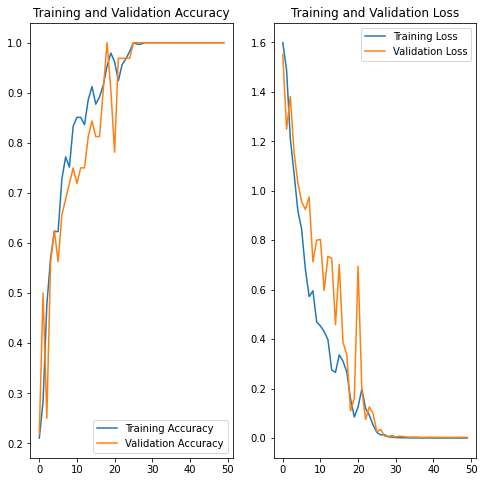

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy
1/1 [==============================] - 6s 6s/step
predicted label: Healthy


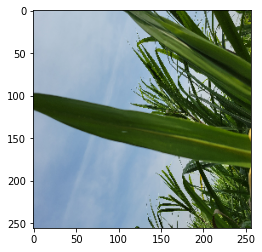

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


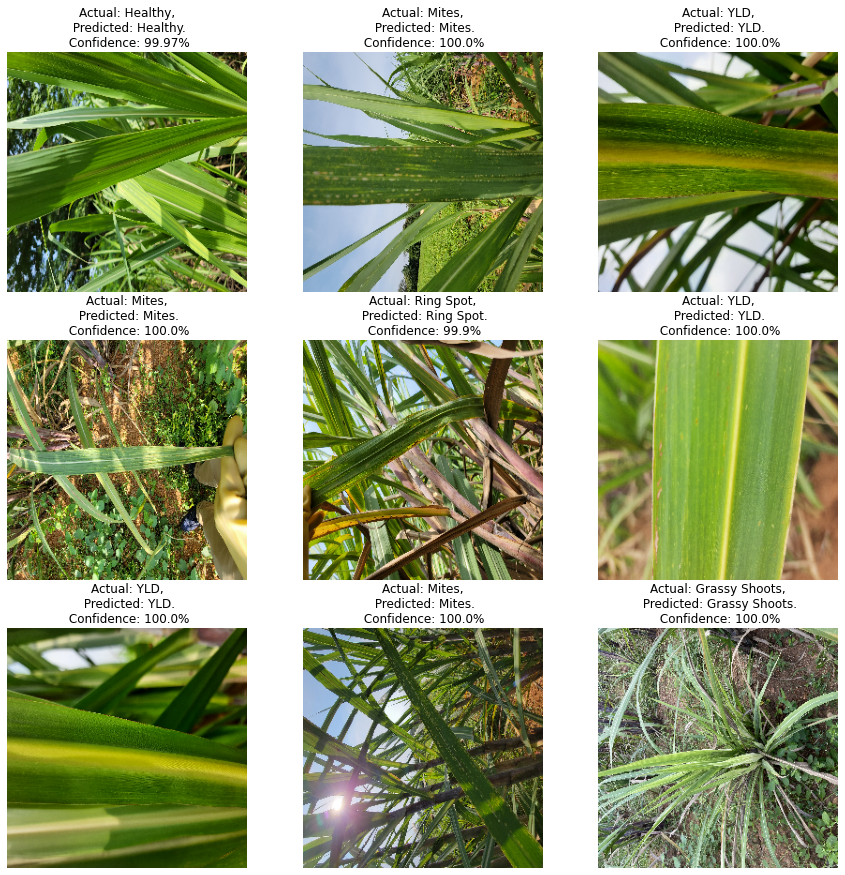

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("D:\Machine lrning\plant disease\Leave DataSet\models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [ ]:
model.save("../my_model")

In [ ]:
loaded_model = tf.keras.models.load_model('my_model')

1/1 [==============================] - 0s 34ms/step


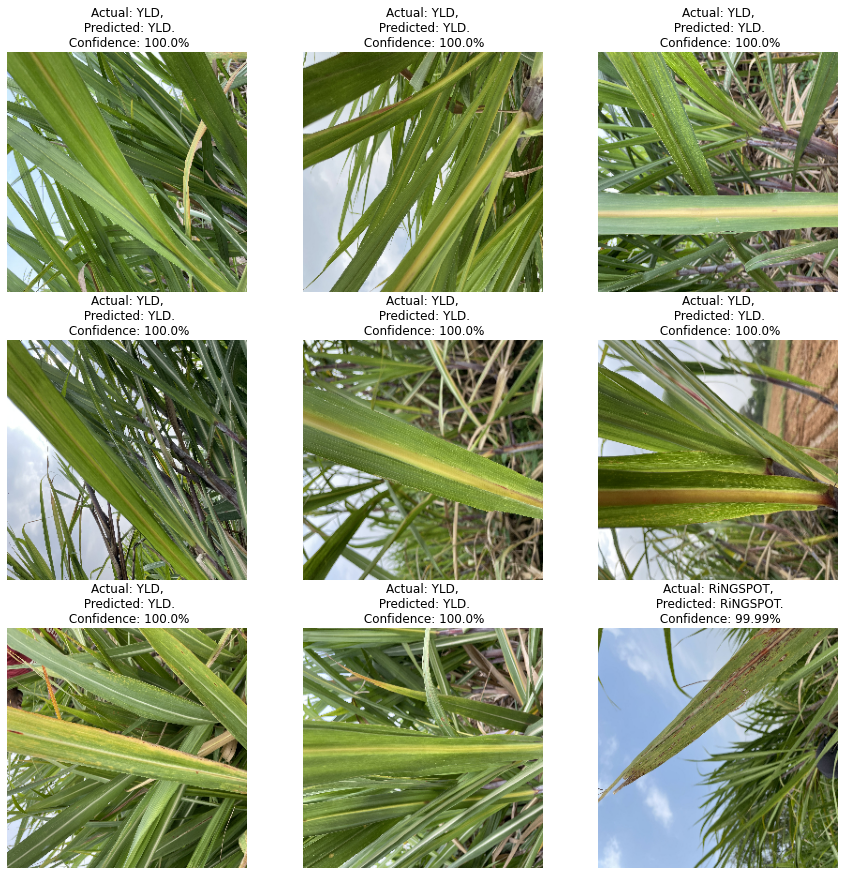

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(loaded_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")